*Mehrdad Mokhtari*

*NLP Data Scientist - Chata Technology Inc.*



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('/content/drive/My Drive/Chata-dataset/sentiment_dataset_train.csv', engine='python', encoding='utf-8', error_bad_lines=False)
data_dev = pd.read_csv('/content/drive/My Drive/Chata-dataset/sentiment_dataset_dev.csv', engine='python', encoding='utf-8', error_bad_lines=False)
data_test = pd.read_csv('/content/drive/My Drive/Chata-dataset/sentiment_dataset_test.csv', engine='python', encoding='utf-8', error_bad_lines=False)

# data_train.shape
data_dev.head()

,id,review,rating
0,0,"The hotel position is very good, center of the...",2
1,1,Not a very big room but very comfortable and c...,4
2,2,The hotel is located near Kurfürstendamm in a ...,4
3,3,My booking was for 2 rooms and I have made the...,2
4,4,"Excellent hotel, fantastic swimming pool, very...",5


In [3]:
# Check the missing values (remove all null reviews)
data_train = data_train[data_train['review'].notnull()]
data_dev = data_dev[data_dev['review'].notnull()]
data_test = data_test[data_test['review'].notnull()]

data_train.shape

(35005, 3)

2                                                7031
1                                                7028
4                                                6997
5                                                6977
3                                                6971
Tables not made up prior to guest seating. 2.       1
Name: rating, dtype: int64
1    1523
2    1507
4    1500
5    1486
3    1483
Name: rating, dtype: int64


Text(0.5, 1.0, 'Counts of each sentiment in train data')

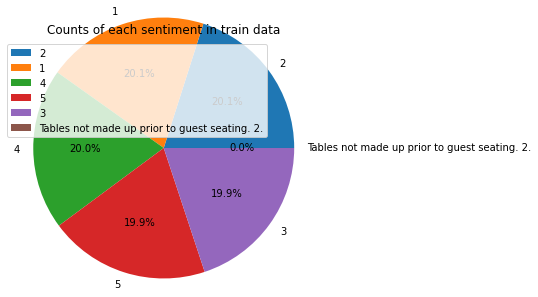

In [4]:
# EDA 1
# Ref: https://www.kaggle.com/sai24kumar/sentimental-anlysis-with-multinomial-nb
Count_train = data_train['rating'].value_counts()
print(Count_train)
Count_dev = data_dev['rating'].value_counts()
print(Count_dev)
# Count_train.plot.barh()

plt.pie(Count_train,radius=1.5,
        labels=Count_train.index,
        autopct=lambda x:str(np.round(x,1))+"%",explode=(0,0,0,0,0,0))

plt.legend(loc="best")
plt.title("Counts of each sentiment in train data")


Text(0.5, 1.0, 'Counts of each sentiment in validation data')

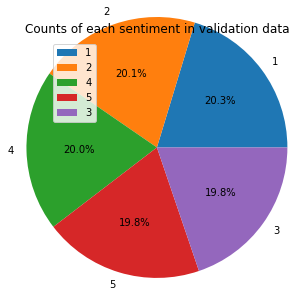

In [5]:
plt.pie(Count_dev,radius=1.5,
        labels=Count_dev.index,
        autopct=lambda x:str(np.round(x,1))+"%",explode=(0,0,0,0,0))

plt.legend(loc="upper left")
plt.title("Counts of each sentiment in validation data")

In [6]:
data_train["rating"].value_counts(normalize = True)
data_dev["rating"].value_counts(normalize = True)

1    0.203094
2    0.200960
4    0.200027
5    0.198160
3    0.197760
Name: rating, dtype: float64

In [7]:
# As you can see the distribution of the data in both train and validation sets are very well balanced. \
# However, there is one example in the training set that some unwanted texts got into its rating. So, I just remove that row!

for i in range(len(data_train)):
    if not data_train['rating'][i].isnumeric():
        data_train.drop(i, inplace = True)


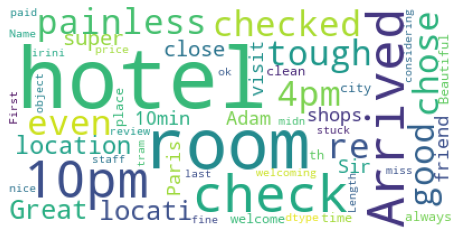

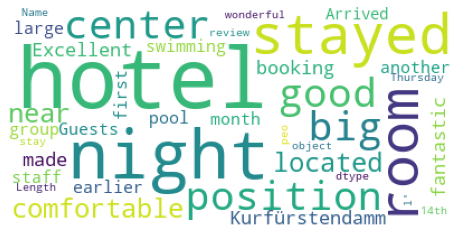

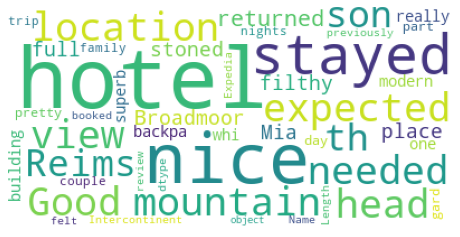

In [8]:
# EDA 2(optional)
# EDA ref: https://www.kaggle.com/jonathanoheix/sentiment-analysis-with-hotel-reviews#Exploratory-data-analysis

# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 10000000,
        max_font_size = 75, 
        scale = 1,
        random_state = 2020
         ).generate(str(data))

    fig = plt.figure(1, figsize = (8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data_train["review"])
show_wordcloud(data_dev["review"])
show_wordcloud(data_test["review"])

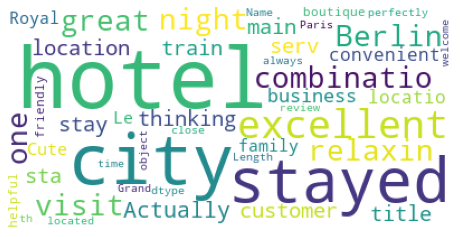

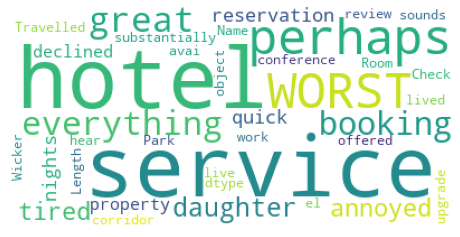

In [9]:
show_wordcloud(data_train[data_train['rating'] == '5']['review'])
show_wordcloud(data_train[data_train['rating'] == '1']['review'])
# WordClouds say it all!

In [10]:
# Data Cleaning/pre-processing
# Let's clean the reviews (text data) and prepare them for the next steps
# Ref Data Cleaning: https://towardsdatascience.com/cleaning-preprocessing-text-data-for-sentiment-analysis-382a41f150d6

import re
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

# First, transform all reviews into lower case and overwrite them in 'review' column:
data_train['review_new'] = data_train['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_dev['review_new'] = data_dev['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_test['review_new'] = data_test['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# data_train.head()

# Second, remove punctuations:
data_train['review_new'] = data_train['review_new'].str.replace('[^\w\s]','')
data_dev['review_new'] = data_dev['review_new'].str.replace('[^\w\s]','')
data_test['review_new'] = data_test['review_new'].str.replace('[^\w\s]','')

# Third, remove emoji’s:
# REF: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data_train['review_new'] = data_train['review_new'].apply(lambda x: remove_emoji(x))
data_dev['review_new'] = data_dev['review_new'].apply(lambda x: remove_emoji(x))
data_test['review_new'] = data_test['review_new'].apply(lambda x: remove_emoji(x))

# Then, remove STOPWORDS-EN:
stop_words = set(stopwords.words('english'))
# Two wordclouds show a bunch of frequent words, such as hotel and room, which \
# do not add any valuable info to our predictive model for capturing sentiments, so I include them in stopwords!

# Add words that aren't in the NLTK stopwords list
new_stopwords = ['hotel', 'room', '4pm', '10pm', 'night', 'stayed', 'Arrived', 'month', 'checked', 'another', 'located', 'visit']
new_stopwords_list = stop_words.union(new_stopwords)

# Ref: https://www.cs.cmu.edu/~ark/EMNLP-2015/proceedings/WASSA/pdf/WASSA14.pdf
# Since we are doing sentiment analysis task, we should be careful about negation words in stopwords list!

# Remove negation words that are in NLTK stopwords list
not_stopwords = {'not', 'nor', 'never'} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])

## Adding or removing from stopwords, however, will not change the overall accuracy!

data_train['review_new'] = data_train['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in final_stop_words))
data_dev['review_new'] = data_dev['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in final_stop_words))
data_test['review_new'] = data_test['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in final_stop_words))

# Next, implement lemmatization using Spacy so that we can count the appearance of each word (original form of words)
# From Spacy only keep 'tagger' pipline for lemmatization usage
# REF: https://spacy.io/models/en
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemm(review):
    doc = nlp(review)
    return " ".join([token.lemma_ for token in doc])

# It will take a few minutes to be done! (GPU recommended)
data_train['review_new'] = data_train['review_new'].apply(lemm)
data_dev['review_new'] = data_dev['review_new'].apply(lemm)
data_test['review_new'] = data_test['review_new'].apply(lemm)

data_dev.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,review,rating,review_new
0,0,"The hotel position is very good, center of the...",2,position good center town service not comparab...
1,1,Not a very big room but very comfortable and c...,4,not big comfortable clean next underground fam...
2,2,The hotel is located near Kurfürstendamm in a ...,4,near kurfürstendamm quiet side street itsye bi...
3,3,My booking was for 2 rooms and I have made the...,2,book 2 room make book accor website le club me...
4,4,"Excellent hotel, fantastic swimming pool, very...",5,excellent fantastic swimming pool warm welcome...


In [11]:
# EDA 3
# Ref: https://www.kaggle.com/sid321axn/natural-language-processing-sentiment-analysis

# Create a new column to detect how long the text messages are:
data_train['length_new'] = data_train['review_new'].apply(len)
data_train['length'] = data_train['review'].apply(len)
data_train.head()

,id,review,rating,review_new,length_new,length
0,0,Arrived about 10pm and check in was painless. ...,4,arrive check painless downside look city centr...,471,789
1,1,I checked in at 4pm even tough room was not re...,2,even tough not ready staff busy mobile instead...,302,523
2,2,"I chose this hotel, as it was in a good locati...",2,chose good location bath spa available arrive ...,410,790
3,3,"Great location, super close to shops & a 10min...",4,great location super close shop 10min walk mai...,358,541
4,4,I was in the Sir Adam Hotel to visit a friend....,3,sir adam friend enjoy time bar different music...,112,232


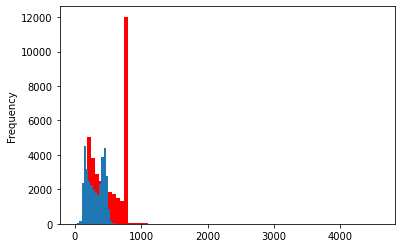

In [12]:
# EDA 

data_train['length'].plot(bins=75, kind='hist', color=['red'])
data_train['length_new'].plot(bins=75, kind='hist')
# As you can see, most of the raw reviews are pretty long, which shows the importance of data cleaning/pre-processing! \
# Compare two plots below!

In [13]:
data_train['length'].describe()
# let's find the longest and the shortest reviews :)

count    35004.000000
mean       535.700149
std        235.593456
min          6.000000
25%        307.000000
50%        532.000000
75%        786.000000
max       4585.000000
Name: length, dtype: float64

In [14]:
data_train[data_train['length'] == 4585]['review'].iloc[0]
# ... Perhaps the longest comment that I have ever seen in my life!

'Where do I start. We stayed at the Petit Auberge for four nights and booked their best room the Petit Suite (this room is at the back of the hotel, outside and all the way at the bottom away from everything. So be warned) and at first glance everything seem good. On the surface the place looked charming and felt quaint. As we were there to celebrate a birthday, we dropped off our luggage and headed over to their sister hotel to hear a local historian talk about the city. Still, everything seemed fine and we were enjoying our day. We went to dinner and came back to our rooms for an early start the next day. When we got to our room we noticed that didn’t have any soap or shampoo or any other amenities. So, I tried calling the front desk and nobody answered. As we travel with our own we didn’t get too worried about it and figured that they will notice it was missing and give us some when they cleaned the room. The next day we went down for breakfast and we were somewhat disappointed with

In [15]:
data_train[data_train['length'] == 6]['review'].iloc[0]
# As you can see, '#NAME?' is an useless input, so rows with this input should be removed

'#NAME?'

In [16]:
data_train = data_train[data_train['review_new'] != 'name']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b14b65b38>,
      dtype=object)

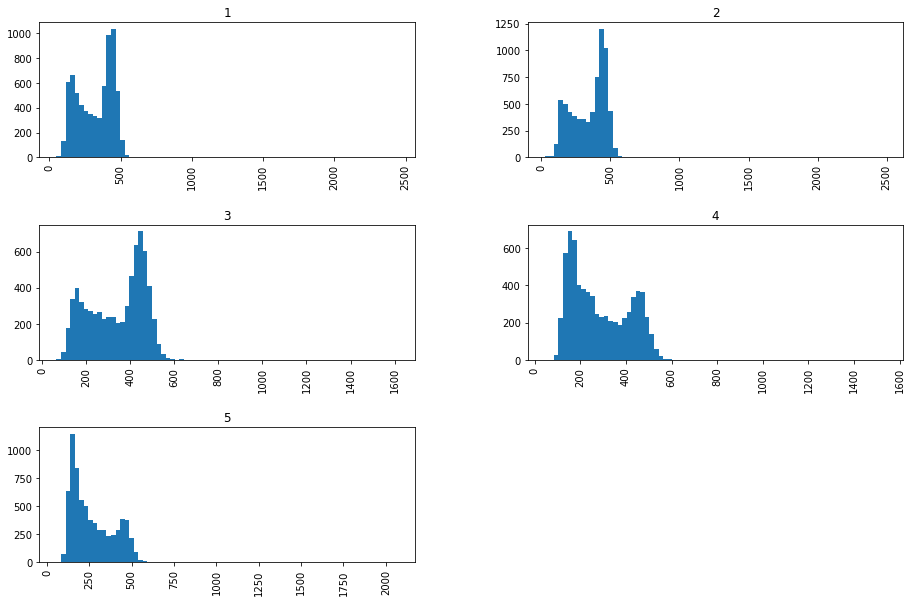

In [17]:
data_train.hist(column='length_new', by='rating', bins=75, figsize=(15,10))
# Cool! Ratings 1, 2, and 3 have almost the same distribution of review length (longer) \
# but ratings 4 and 5 are relativly shorter meaning that when people want to complain or had a bad experience\
# they tend to write more about it :)

In [18]:
# Ref: https://www.kaggle.com/najiaboo/notebookf251803aab
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_vector = vectorizer.fit_transform(data_train['review_new'])

In [19]:
from sklearn.naive_bayes import MultinomialNB

multinomialnb = MultinomialNB()
labels = data_train['rating'].values
multinomialnb.fit(train_vector, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
dev_vector = vectorizer.transform(data_dev['review_new'])
y_pred =  multinomialnb.predict(dev_vector)
y_dev = data_dev['rating'].values.astype(int).astype(str)

In [21]:
# Add the predicted ratings on validation set to its csv file
data_dev['predicted_rating'] = y_pred
data_dev.to_csv('dev_dataset.csv', encoding='utf-8', index=False)
data_dev.tail(10)

,id,review,rating,review_new,predicted_rating
7489,7489,My experience comes from around 60 hotel stay...,2,experience come around 60 stay world since 12y...,2
7490,7490,I recently stayed at the lovely Esprit St. Ger...,5,recently lovely esprit st germain location per...,5
7491,7491,Loved this funk hotel on the outskirts of Amst...,3,love funk outskirt amsterdam round fantastic v...,3
7492,7492,This hotel has been around for a long time and...,3,around long time certain quaint ambiance room ...,3
7493,7493,It was nice to stay at the place so convenient...,4,nice stay place convenient term well equip roo...,2
7494,7494,we stayed here earlier this month with another...,5,early couple room bit like ikea modern comfort...,4
7495,7495,We stayed 3 nights at this hotel. The staff ...,3,3 night staff general really great friendly th...,3
7496,7496,"Our first night here, a large group of Guests ...",2,first large group guest one one good suit righ...,1
7497,7497,Arrived here on Thursday 14th with 5 other peo...,3,arrive thursday 14th 5 people pleasantly surpr...,1
7498,7498,I had a wonderful 5 night stay at the Hotel l'...,5,wonderful 5 stay lolivier staff sweet helpful ...,5


In [22]:
from sklearn.metrics import classification_report
print('\nClassification report on dev set\n')
print(classification_report(y_dev, y_pred, 
                            target_names = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']))

# Accuracy = 0.75


Classification report on dev set

              precision    recall  f1-score   support

    Rating 1       0.78      0.82      0.80      1523
    Rating 2       0.71      0.69      0.70      1507
    Rating 3       0.70      0.74      0.72      1483
    Rating 4       0.72      0.74      0.73      1500
    Rating 5       0.86      0.77      0.82      1486

    accuracy                           0.75      7499
   macro avg       0.75      0.75      0.75      7499
weighted avg       0.75      0.75      0.75      7499



In [23]:
# Test data predictions
test_vector = vectorizer.transform(data_test['review_new'])
y_pred_test =  multinomialnb.predict(test_vector)

In [24]:
# Add the predicted ratings on test set to its csv file
data_test['predicted_rating'] = y_pred_test
data_test.to_csv('test_dataset.csv', encoding='utf-8', index=False)
data_test.tail(10)

,id,review,review_new,predicted_rating
6490,7489,First its a 14 room pension house not a resort...,first 14 pension house not resort nice swimmin...,3
6491,7490,We stayed as a family at this hotel. It's a be...,family beautiful room nice relax warn pay delu...,2
6492,7491,The hotel has a perfect location. The beds are...,perfect location bed comfortable bed linen hig...,3
6493,7492,"If you're on budget, the Lodge is an ideal pla...",-PRON- be budget lodge ideal place stay stockh...,3
6494,7493,I found the best deal at the time of IFA Berli...,find good deal time ifa berlin realy cheap rat...,5
6495,7494,"The building is a superb one, pretty nice gard...",build superb one pretty nice garden surround p...,3
6496,7496,I stayed here as part of a 3 day family trip t...,part 3 day family trip amsterdam location main...,3
6497,7497,We stayed in this hotel for 2 nights (couple +...,2 night couple 2 teenage son location good clo...,3
6498,7498,I have previously felt that the Intercontinent...,previously feel intercontinental hotel nicer e...,2
6499,7499,We booked this hotel on Expedia because of its...,book expedia positive review location unfortun...,1


In [25]:
# Save the trained model for inference 
# Ref: https://stackabuse.com/scikit-learn-save-and-restore-models/

import pickle

pkl_filename = "pickle_basic_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(multinomialnb, file)